https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?resource=download

The dataset contains a list of transitions from multiple credit cards. The CSV includes transaction details, such as distance from home, distance from the last location, ratio_to_median, repeat retailer, used chip, used PIN, online order, and fraud. The target variable for this variable will be the fraud column, as it classifies each transaction as legitimate or fraudulent. The majority of transactions will be non-fraudulent. I predict a high accuracy score balanced the data using undersampiling.

(1000, 8)
ANOVA Test
[ 98.09235214   4.91633428 228.36928148   0.86452933  11.47327612
  33.58788424]
[0.         0.02682858 0.         0.35269913 0.0007336  0.00000001]
Chi-Squared
[13563.54859685  1145.35638825   619.66519005     0.09260979
    10.03583062    10.64692433]
[0.         0.         0.         0.7608852  0.00153524 0.00110254]
underSampling
[(0, 14), (1, 51), (2, 935)]
prediction model


0.835

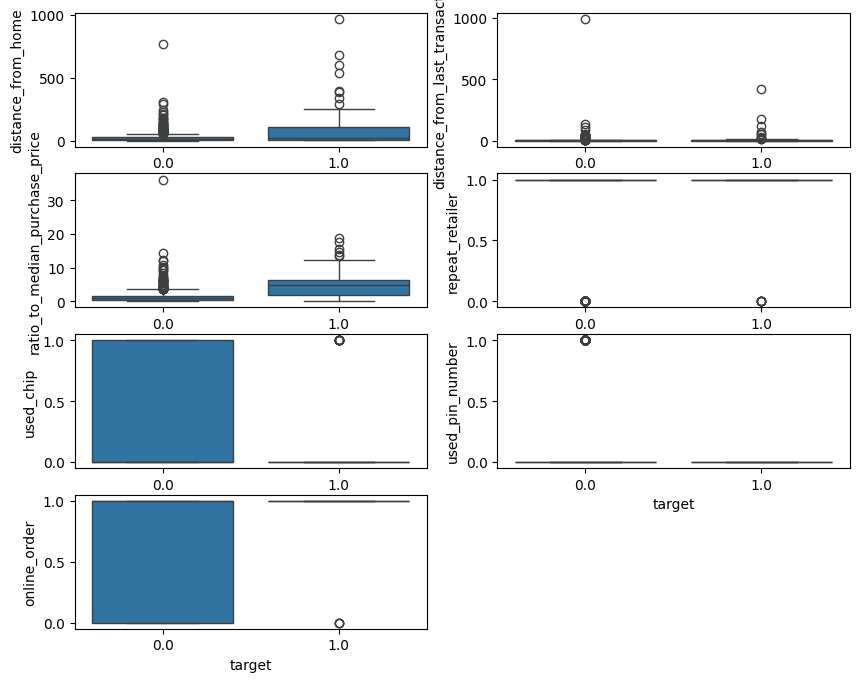

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import collections
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('card_transdata.csv')
df = df.rename(columns={'fraud': 'target'})
df = df.dropna()

df = df.iloc[:1000]

print(df.shape)
#Box Plot
import seaborn as sns
num_list=['distance_from_home', 'distance_from_last_transaction','ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number','online_order']
fig=plt.figure(figsize=(10, 8))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(4,2,i+1)
    sns.boxplot(x='target',y=column, data=df)

threshold = 1.5

distance_from_hoome_Q1 = df['distance_from_home'].quantile(0.25)
distance_from_hoome_Q3 = df['distance_from_home'].quantile(0.75)
distance_from_hoome_IQR = distance_from_hoome_Q3 - distance_from_hoome_Q1

distance_from_home_outliers = df[(df['distance_from_home'] < distance_from_hoome_Q1 - threshold * distance_from_hoome_IQR) | (df['distance_from_home'] > distance_from_hoome_Q3 + threshold * distance_from_hoome_IQR)]

ratio_to_median_purchase_price_Q1 = df['ratio_to_median_purchase_price'].quantile(0.25)
ratio_to_median_purchase_price_Q3 = df['ratio_to_median_purchase_price'].quantile(0.75)
ratio_to_median_purchase_price_IQR = ratio_to_median_purchase_price_Q3 - ratio_to_median_purchase_price_Q1

distance_from_home_outliers = df[(df['distance_from_home'] < ratio_to_median_purchase_price_Q1 - threshold * ratio_to_median_purchase_price_IQR) | (df['distance_from_home'] > ratio_to_median_purchase_price_Q3 + threshold * ratio_to_median_purchase_price_IQR)]

distance_from_last_transaction_Q1 = df['distance_from_last_transaction'].quantile(0.25)
distance_from_last_transaction_Q3 = df['distance_from_last_transaction'].quantile(0.75)
distance_from_last_transaction_IQR = distance_from_last_transaction_Q3 - distance_from_last_transaction_Q1

distance_from_home_outliers = df[(df['distance_from_home'] < distance_from_last_transaction_Q1 - threshold * distance_from_last_transaction_IQR) | (df['distance_from_home'] > distance_from_last_transaction_Q3 + threshold * distance_from_last_transaction_IQR)]

#Anova Test - Repeat_retailer Irrelevant
#After reviewing the p values from the Anova test the Repeat_retailer is have decided basesed on the score that this feature is irrelevent to the target variable.
print('ANOVA Test')
from sklearn.feature_selection import SelectKBest, f_classif, chi2
x = df.loc[:, ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price', 'repeat_retailer','used_pin_number','online_order']]
y = df.loc[:, 'target']

fs = SelectKBest(score_func=f_classif, k='all')  # call the method
bestFeatures = fs.fit(x, y)    # train the model
np.set_printoptions(suppress = True)
print(bestFeatures.scores_)    # print out the scores
print(bestFeatures.pvalues_)

#Chi-squared
print('Chi-Squared')
x = df.loc[:, ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price', 'repeat_retailer','used_pin_number','online_order']]
y = df.loc[:, 'target']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)
print(catFeatures.scores_)
print(catFeatures.pvalues_)

#Split the data
x = df.loc[:,df.columns!='target']
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

print("underSampling")
from collections import Counter
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=7, n_informative=4,
                           n_redundant=3, n_repeated=0, n_classes=3,
                           n_clusters_per_class=2,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)
print(sorted(Counter(y).items()))
[(0, 64), (1, 262), (2, 4674)]
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X, y)

print('prediction model')
from sklearn.linear_model import LogisticRegression
df = pd.DataFrame(data=df)
LogRegression = LogisticRegression( max_iter=2000)
LogRegression.fit(X_resampled, y_resampled)

from sklearn.metrics import accuracy_score
test_pred = LogRegression.predict(x_test)
accuracy_score(y_test, test_pred)
